# Development of classification models for mode choices



/// All classification models to be run

// reflect and choose which one is best and why

// what to do to improve prediction accuracy of models

connected to data? hyperparameters?? with which they work better?

Assignment task: Find the best classification model for the travel mode choices prediction (assignment submission) 

Your task is to analyse the provided dataset, which contains information about individuals' choices of travel mode.

Identify which classification model works the best and whether there is a considerable difference in the results.
Identify which model, together with its corresponding hyperparameters, gives the best performance for mode choice predictions.
Provide a reflection on the underlying reasons why certain classification models may achieve better prediction accuracy compared to others when applied to this dataset.
What would you suggest doing to improve the prediction accuracy of the developed classification models (any opinion about the dataset?)

### Data Overview

##### Importing libraries

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [16]:
data = pd.read_csv('modeChoiceData.csv')


In [41]:
data=data.iloc[:1000]

In [42]:
def preproc_split(df):
    x = df.drop(['choice'], axis=1)
    y = df['choice']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    return x_train, x_test, y_train, y_test

In [43]:
def encoding_choice(data, n):
    # print("Enter your choice\n1. One-hot Encoding\n2. Label Encoding\n3. Dummy Encoding\n")
    if n == 1:
        print("Performing One-hot Encoding...\n")
        df = pd.get_dummies(data, columns=['service_air', 'service_rail'])
    elif n == 2:
        print("Performing Label Encoding...\n")
        encoder = LabelEncoder()
        df=data.copy()
        df['service_air'] = encoder.fit_transform(df['service_air'])
        df['service_rail'] = encoder.fit_transform(df['service_rail'])
    elif n == 3:
        print("Performing Dummy Encoding...\n")
        df=data.copy()
        dummy_df = pd.get_dummies(df[['service_air', 'service_rail']], drop_first=True)
        df = pd.concat([df, dummy_df], axis=1)
        df=df.drop(['service_air', 'service_rail'],axis=1)
    else:
        print("Performing One-hot Encoding...\n")
        df = pd.get_dummies(data, columns=['service_air', 'service_rail'])

    return df

In [44]:
def grid_search(model, params, x_train,y_train):
    gridSearch = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
    return gridSearch

In [45]:
def perf_lr(x_train,y_train):
    params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    }
    model = LogisticRegression(max_iter=1000, random_state=0)
    gridSearch = grid_search(model, params,x_train,y_train)
    gridSearch.fit(x_train, y_train)
    
    # Retrieve the best hyperparameters identified by the grid search
    best_params = gridSearch.best_params_
    print("Best Parameters: \n")
    print(best_params)

    # Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
    best_score = gridSearch.best_score_

    # Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
    model = gridSearch.best_estimator_

    cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

    ##---------------------Different measurements---------------------------
    print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
    print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
    print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

In [46]:
def perf_knn(x_train,y_train):
    params = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
    model=KNeighborsClassifier()

    gridSearch = grid_search(model, params,x_train,y_train)
    gridSearch.fit(x_train, y_train)

    # Retrieve the best hyperparameters identified by the grid search
    best_params = gridSearch.best_params_
    print("Best Parameters: \n")
    print(best_params)

    # Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
    best_score = gridSearch.best_score_

    # Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
    model = gridSearch.best_estimator_

    cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

    ##---------------------Different measurements---------------------------
    print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
    print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
    print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')    

In [47]:
def perf_rf(x_train,y_train):
    
    params = {
    'n_estimators': [1000, 2000, 3000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

    model = RandomForestClassifier(random_state=0)

    gridSearch = grid_search(model, params,x_train,y_train)
    gridSearch.fit(x_train, y_train)

    # Retrieve the best hyperparameters identified by the grid search
    best_params = gridSearch.best_params_
    print("Best Parameters: \n")
    print(best_params)

    # Retrieve the best cross-validated accuracy score achieved with the best hyperparameters
    best_score = gridSearch.best_score_

    # Set 'model' to be the best estimator (model with the best hyperparameters) identified by the grid search
    model = gridSearch.best_estimator_

    cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)

    ##---------------------Different measurements---------------------------
    print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
    print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
    print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')    

In [48]:
def model_choice_perf(xtrain, ytrain,y_test=None):
    mod_name = input("Enter the model name \nLogistic Regression: LR\nK-Nearest Neighbors: KNN\nRandom Forest: RF\nXGBoost: XGBoost\nSupport Vector Machine: SVM\n ")
    if str.lower(mod_name) == 'lr':
        print("Model Choice: Logistic Regression\n")
        perf_lr(xtrain,ytrain)
        
    #     model.fit(xtrain, ytrain)
    #     cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
    #     print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
    #     # Calculate different measurements
    #     print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
    #     print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
    #     print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')
    
    elif str.lower(mod_name) == 'knn':
        print("Model Choice: K-Nearest Neighbours\n")
        perf_knn(xtrain,ytrain)
    #     cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
    #     print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
    #     # Calculate different measurements
    #     print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
    #     print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
    #     print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

    elif str.lower(mod_name) == 'rf':
        print("Model Choice: Random Forest\n")
        perf_rf(xtrain,ytrain)
    #     model = RandomForestClassifier(random_state=0)
    #     cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
    #     print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
    #     # Calculate different measurements
    #     print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
    #     print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
    #     print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')

    # elif str.lower(mod_name) == 'xgboost':
    #     map = {'air': 0, 'bus': 1, 'car': 2,'rail':3}
    #     y_train = y_train.map(map)
    #     y_test = y_test.map(map)
    #     model =  XGBClassifier()
    #     cmd.from_estimator(model, x_test, y_test,cmap='Blues',colorbar=False)
    #     print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
    #     # Calculate different measurements
    #     print(f'Accuracy: {accuracy_score(y_test,model.predict(x_test))}')
    #     print(f'Precision: {precision_score(y_test,model.predict(x_test),average=None)}')
    #     print(f'Recall: {recall_score(y_test,model.predict(x_test),average=None)}')
    
    # # elif str.lower(mod_name) == 'svm':
    # #     model= SVC(kernel="linear")
    else:
        print("Please enter a valid model name")

Performing One-hot Encoding...

Model Choice: Random Forest

Best Parameters: 

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 2000}
Accuracy: 0.54
Precision: [0.5        0.         0.38888889 0.68604651]
Recall: [0.4375     0.         0.50909091 0.67816092]


c:\Users\Trisha Chander\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


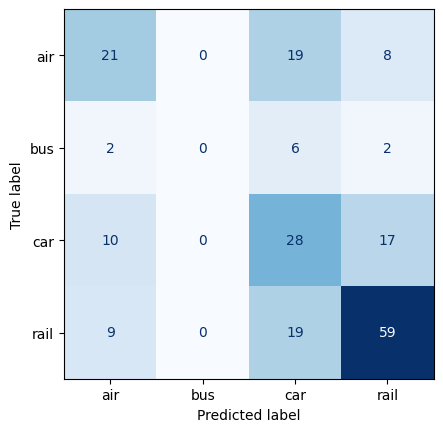

In [49]:
encoded_df = encoding_choice(data, 1)
x_train, x_test, y_train, y_test = preproc_split(encoded_df)
model_choice_perf(x_train, y_train)